<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/arch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with ARCH Derivatives

In this notebook we'll setup an environment and download some example derivatives from Archive-It's ARCH service to demostrate some examples of further exploring web archive derivative datasets.



# Datasets

First, we will need to download some derivative data from ARCH. In this notebook, we'll be taking a look at the image information and domain frequency output.

In [28]:
%%capture

!mkdir data
!curl -u ResearcherDL:somepassword "https://webdata.archive-it.org/ait/75/research_services/download/ARCHIVEIT-13695/DomainFrequencyExtraction/domain-frequency.csv.gz" --output data/domain-frequency.csv.gz
!curl -u ResearcherDL:somepassword "https://webdata.archive-it.org/ait/75/research_services/download/ARCHIVEIT-13695/ImageInformationExtraction/image-information.csv.gz" --output data/image-information.csv.gz
!gunzip data/*

Let's make sure they've downloaded, and then we can proceed.


In [29]:
!ls -1 data

domain-frequency.csv
domain-frequency.csv.gz
image-information.csv
image-information.csv.gz


# Environment

Next, we'll setup our environment so we can work with the Parquet output with [Pandas](https://pandas.pydata.org).

In [3]:
import numpy as np
import pandas as pd

# Loading our ARCH Datasets as DataFrames

---



Next, we'll setup our datasets as pandas DataFrames to work with, and show a preview of each.


## Images

The following commands create a variable called `images` is a DataFrame with all of the image information from the web archive, and then preview the DataFrame.

In [8]:
images = pd.read_csv('data/image-information.csv')
images

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
0,20200629,https://hash.qualia.id/g.png?p=9a5f7968-45f9-4...,g.png,png,image/png,image/png,0,0,669afadfc836f36ab8169a1d70a5e46b,59870971e910944aa053c16f14de8af710da6f84
1,20200629,https://sb.freeskreen.com/t.gif?tm=1593433806&...,t.gif,gif,image/gif,image/gif,0,0,07fff40b5dd495aca2ac4e1c3fbc60aa,e8ac224ba9ee97e87670ed6f3a2f0128b7af9fe4
2,20200629,https://tpc.googlesyndication.com/simgad/10728...,10728063185053876749,jpg,image/jpeg,image/jpeg,0,0,55383a7deb1cd757ef9d42d0a7dfe00f,e3d455ce13ea4b1ec2d70952f57d8cfcba9e908c
3,20200629,https://tpc.googlesyndication.com/simgad/81723...,8172337643687860486,jpg,image/jpeg,image/jpeg,0,0,df22c169abe29bbd33ec616582fb0bf9,88736be6e49eafed08602c370c501ad975b74778
4,20200629,https://tpc.googlesyndication.com/simgad/12415...,12415734370613421636,jpg,image/jpeg,image/jpeg,0,0,a5cf6978f443f239b4fa87a35d410b0e,7defdccd28fcf14b2418eeffff0c9f84f36228f6
...,...,...,...,...,...,...,...,...,...,...
2635884,20210627,https://www150.statcan.gc.ca/n1/pub/45-28-0001...,c-g02-eng.png,png,image/png,image/png,0,0,9d79fed1ebee2d4826259840e6c0b6e8,501cd927373f61c9c9c03e49365c819a619aaba9
2635885,20210627,https://www150.statcan.gc.ca/n1/pub/45-28-0001...,c-g03-eng.png,png,image/png,image/png,0,0,090feb816c90ac6445e9865e6f18f3e7,733ad08ba5e264c5a1f8c1ce24db974f22bb17e5
2635886,20210627,https://www150.statcan.gc.ca/n1/pub/45-28-0001...,c-g01-eng.png,png,image/png,image/png,0,0,29d066621a8a5946bb587e4b952b803f,1d5403b3c81826e0ccd7654e4c1360a05dba7521
2635887,20210627,https://pm.gc.ca/sites/pm/files/media/override...,20210528_PM_NR_LifeAffordable_EN.jpg,jpg,image/jpeg,image/jpeg,0,0,d5ddaef76b5f388a0b59f3eaf4855e61,bc912d3c27ee1a8a8c8c7263d178c65451954dba


# Data Table Display

Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.

Data table display for Pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

Note: There appears to be a limit to how many rows can be used in the Data Table display. It doesn't work with all examples in this notebook.


In [6]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## Domains

This derivative contains basic information about what's been collected in the crawl. Specifically we can analyze how often pages from each domain appear.

Note: You can also take of the Data Table extension to experiment with interacting with the DataFrame.

In [7]:
domains = pd.read_csv('data/domain-frequency.csv')
domains

,domain,count
0,news.ontario.ca,667067
1,twitter.com,263231
2,googleads.g.doubleclick.net,258230
3,data.ontario.ca,228838
4,ontario.ca,207518
...,...,...
49037,340dc4b6ce4a3baad39ad6ccfdaa179a.safeframe.goo...,1
49038,d1d730447b42200b84b5165d36c338fb.safeframe.goo...,1
49039,87847d95338d0e9e704e8fba20d5bee8.safeframe.goo...,1
49040,9de242284df0b079910cafb29d4836d1.safeframe.goo...,1


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files



#### Count number of rows (how many images are in the web archive collection).


In [9]:
images.count()

crawl_date              2635889
url                     2635889
filename                2629110
extension               2635889
mime_type_web_server    2635843
mime_type_tika          2635889
width                   2635889
height                  2635889
md5                     2635889
sha1                    2635889
dtype: int64

 #### How many unique images are in the collection?

 We can see if an image is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it. The exact same image might be called `example.jpg` and `foo.jpg` - by computing the hash, we can see that even with different file names, they are actually the same image!




In [10]:
len(images.md5.unique())

1736233

#### What are the top 10 most occurring images in the collection?

Here we discover which image (or images) occur most frequently. 

In [11]:
images['md5'].value_counts().head(10)

28d6814f309ea289f847c69cf91194c6    3999
d89746888da2d9510b64a9f031eaecd5    2528
9430fc14c5b042e3e239495358bbb09c    1311
556cdbbf2f0bf9ebff23749b26b9928b    1306
ad4b0f606e0f8465bc4c4c170b37e1a3     855
d1af27fa69c64002a9c1b1c49bd333f7     654
602b32edfe80692aeaed4538ce600d46     610
09bd5b5426a668d935e28a5e7b667ac9     540
b798f4ce7359fd815df4bdf76503b295     512
e4d673a55c5656f19ef81563fb10884c     419
Name: md5, dtype: int64


#### What's the information around all of the occurances of `b09dc3225d5e1377c52c06feddc33bfe`?

What, you mean you don't know what `b09dc3225d5e1377c52c06feddc33bfe` means? Let's find those images in the DataFrame table - we can here see the real file name (`erosion.jpg`) and more importantly, its URL within the web archive.

Note: You can also take of the Data Table extension to experiment with interacting with the DataFrame.


In [14]:
images.loc[images['md5'] == 'e4d673a55c5656f19ef81563fb10884c']

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
20850,20200513,https://pixel.wp.com/g.gif?v=ext&j=1%3A7.1.2&b...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
20896,20200513,https://pixel.wp.com/g.gif?v=ext&j=1%3A6.0&blo...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
21336,20200413,https://pixel.wp.com/g.gif?v=ext&j=1%3A8.4.1&b...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
22068,20200505,https://pixel.wp.com/g.gif?v=ext&j=1%3A6.0&blo...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
22989,20200413,https://pixel.wp.com/g.gif?v=ext&j=1%3A6.0&blo...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
...,...,...,...,...,...,...,...,...,...,...
41142,20200804,https://pixel.wp.com/g.gif?blog=95193359&v=wpc...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
41144,20200804,https://pixel.wp.com/g.gif?crypt=UE40eW5QN0p8M...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
1261565,20200629,https://pixel.wp.com/g.gif?v=ext&j=1%3A8.6.1&b...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443
1690895,20200908,https://pixel.wp.com/g.gif?blog=135635730&v=wp...,g.gif,gif,image/gif,image/gif,0,0,e4d673a55c5656f19ef81563fb10884c,1f2d8ed221d39329251ad3a6ff1edb20b7219443


### What does `b09dc3225d5e1377c52c06feddc33bfe` look like?

We can extract the binary from the web archive using our [binary extraction functions](https://github.com/archivesunleashed/aut-docs-new/blob/master/current/image-analysis.md#scala-df).

```scala
import io.archivesunleashed._
import io.archivesunleashed.df._

val df = RecordLoader
  .loadArchives("example.arc.gz", sc)
  .extractImageDetailsDF();

df.select($"bytes", $"extension")
  .saveToDisk("bytes", "/path/to/export/directory/your-preferred-filename-prefix", $"extension")
```

**But**, since we don't have access to the WARC files here, just the Parquet derivatives, we can make do  by trying to display a live web version of the image or a replay URL. In this case, BANQ's replay service is available at [https://waext.banq.qc.ca](http://waext.banq.qc.ca).

In [ ]:
pd.options.display.max_colwidth = None
one_image = images.loc[images['md5'] == 'b09dc3225d5e1377c52c06feddc33bfe'].head(1)
one_image['url']

46963    http://www.mddefp.gouv.qc.ca//poissons/st-charles/erosion.jpg
Name: url, dtype: object

![fish](http://waext.banq.qc.ca/wayback/20121127103149/http://www.mddefp.gouv.qc.ca/poissons/st-charles/erosion.jpg)

Unfortunately, while we can tell you this is such a popular image within the web archive, we can't tell you _why_. That's where the researcher comes in!

#### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `carte-p.jpg` for example, might actually be referring to different images who happen to have the same name.


In [15]:
top_filenames = images['filename'].value_counts().head(10)
top_filenames

chart               39431
hqdefault.jpg       27845
photo.php           13776
favicon.ico          8271
large_images.jpg     5811
downsize_200k_v1     5445
hover_images.jpg     4822
collect              3745
doug_ford.jpg        3555
trudeau.jpg          3549
Name: filename, dtype: int64

#### Let's plot it!

We'll plot the data first with panadas plot functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

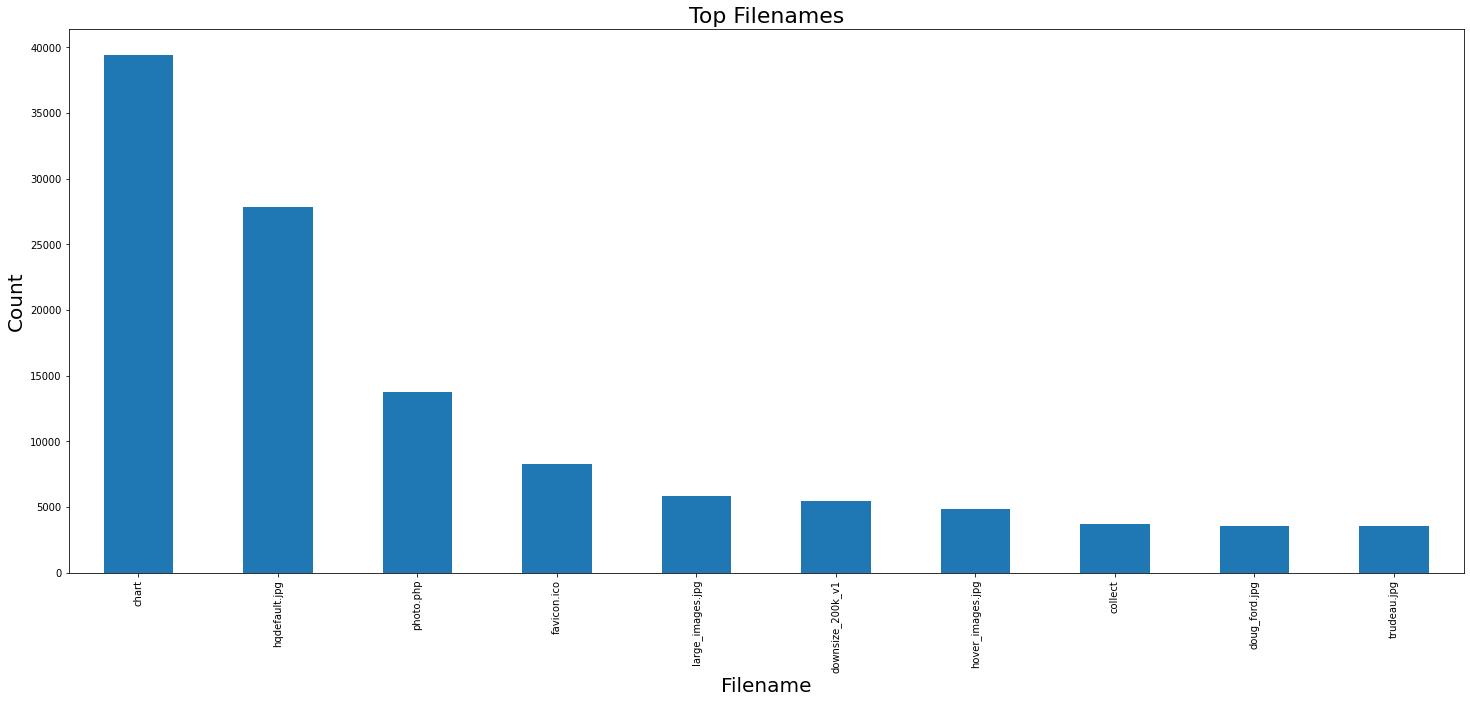

In [16]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25,10))
top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup Altair, and plot the data with Altair. We'll use Altair for the remaining plots we create since the plots can be easily exported as a PNG or SVG.

In [17]:
import altair as alt

In [18]:
top_filenames_altair = images['filename'].value_counts().head(10).rename_axis('Filename').reset_index(name='Count')

filenames_bar = alt.Chart(top_filenames_altair).mark_bar().encode(
    x='Filename:O',
    y='Count:Q'
)

filenames_rule = alt.Chart(top_filenames_altair).mark_rule(color='red').encode(
    y='mean(Count):Q'
)


filenames_text = filenames_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(filenames_bar + filenames_rule + filenames_text).properties(width=1400, height=700, title='Top Filenames')

alt.LayerChart(...)

#### How about a MIME type distribution?

What _kind_ of image files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [19]:
image_mime_types = images['mime_type_tika'].value_counts().head(5).rename_axis('MIME Type').reset_index(name='Count')

image_mimes_bar = alt.Chart(image_mime_types).mark_bar().encode(
    x='MIME Type:O',
    y='Count:Q'
)

image_mime_rule = alt.Chart(image_mime_types).mark_rule(color='red').encode(
    y='mean(Count):Q'
)

image_mime_text = image_mimes_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(image_mimes_bar + image_mime_rule + image_mime_text).properties(width=1400, height=700, title='Images MIME Type Distribution')

alt.LayerChart(...)

#### How about the distribution of the top 10 domains?

Here we can see which domains are the most frequent within the web archive.

In [20]:
top_domains = domains.sort_values('count', ascending=False).head(10)

top_domains_bar = alt.Chart(top_domains).mark_bar().encode(
    x=alt.X('domain:O', title='Domain'),
    y=alt.Y('count:Q', title='Count, Mean of Count')
)

top_domains_rule = alt.Chart(top_domains).mark_rule(color='red').encode(
    y='mean(count):Q'
)

top_domains_text = top_domains_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='count:Q'
)

(top_domains_bar + top_domains_rule + top_domains_text).properties(width=1400, height=700, title='Domains Distribution')

alt.LayerChart(...)

### Top Level Domain Analysis
Now let's create a new column, `tld`, which is based off an existing column, 'Domain'. This example should give you an idea of how you can expand these datasets to do further research and analysis. 

A [top-level domain](https://en.wikipedia.org/wiki/Top-level_domain) refers to the highest domain in an address - i.e. `.ca`, `.com`, `.org`, or yes, even `.pizza`.

Things get a bit complicated, however, in some national TLDs. While `qc.ca` (the domain for Quebec) isn't really a top-level domain, it has many of the features of one as people can directly register under it. Below, we'll use the command `suffix` to include this. 

> You can learn more about suffixes at https://publicsuffix.org.

We'll take the `Domain` column and extract the `tld` from it with [`tldextract`](https://github.com/john-kurkowski/tldextract).

First we'll add the [`tldextract`](https://github.com/john-kurkowski/tldextract) library to the notebook. Then, we'll create the new column.

In [21]:
%%capture

!pip install tldextract

In [22]:
import tldextract

domains['tld'] = domains.apply(lambda row: tldextract.extract(row.domain).suffix, axis=1)
domains

,domain,count,tld
0,news.ontario.ca,667067,ca
1,twitter.com,263231,com
2,googleads.g.doubleclick.net,258230,net
3,data.ontario.ca,228838,ca
4,ontario.ca,207518,ca
...,...,...,...
49037,340dc4b6ce4a3baad39ad6ccfdaa179a.safeframe.goo...,1,com
49038,d1d730447b42200b84b5165d36c338fb.safeframe.goo...,1,com
49039,87847d95338d0e9e704e8fba20d5bee8.safeframe.goo...,1,com
49040,9de242284df0b079910cafb29d4836d1.safeframe.goo...,1,com


#### Next, let's count the distict TLDs.


In [23]:
tld_count = domains['tld'].value_counts()
tld_count

com       41236
ca         3565
org        1272
net         630
on.ca       300
          ...  
co.ma         1
tm            1
com.pa        1
co.bw         1
com.om        1
Name: tld, Length: 318, dtype: int64

#### Next, we'll plot the TLD count.


In [27]:
tld_count = domains['tld'].value_counts().rename_axis('TLD').reset_index(name='Count').head(10)

tld_bar = alt.Chart(tld_count).mark_bar().encode(
    x='TLD:O',
    y='Count:Q'
)

tld_rule = alt.Chart(tld_count).mark_rule(color='red').encode(
    y='mean(Count):Q'
)

tld_text = tld_bar.mark_text(
    align='center',
    baseline='bottom'
).encode(
    text='Count:Q'
)

(tld_bar + tld_rule + tld_text).properties(width=1400, height=700, title='Top Level Domain Distribution')

alt.LayerChart(...)